<a href="https://colab.research.google.com/github/randiijulian/SMS-Classification/blob/main/SMS_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Randi Julian Saputra

Github : github.com/randiijulian

## UAS Mata Kuliah Natural Language Processing
SMS Classification

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Mamasukan Library yang diperlukan
import pandas as pd
import numpy as np

# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# # Load Dataset
home_data = pd.read_excel("/content/drive/MyDrive/Uni Life's/NLP/UAS NLP/Dataset SMS.xlsx")
home_data.head()
# Load Dataset
# home_data = pd.read_excel("/content/Dataset SMS.xlsx")
# home_data.head()

,Kategori,Text
0,Non Spam,Hoaks itu jahat! Kesehatan kita terancam
1,Non Spam,COVID-19 gelombang ketiga? Waspadalah! Segera ...
2,Non Spam,Hambat varian Omicron di Indonesia dengan disi...
3,Non Spam,Walau sudah boleh berkegiatan di luar rumah
4,Non Spam,Vaksinasi lengkap dan booster + disiplin proke...


In [ ]:
# Periksa SMS Text Non Spam
home_data[home_data['Kategori']=='Non Spam'].head()

,Kategori,Text
0,Non Spam,Hoaks itu jahat! Kesehatan kita terancam
1,Non Spam,COVID-19 gelombang ketiga? Waspadalah! Segera ...
2,Non Spam,Hambat varian Omicron di Indonesia dengan disi...
3,Non Spam,Walau sudah boleh berkegiatan di luar rumah
4,Non Spam,Vaksinasi lengkap dan booster + disiplin proke...


In [ ]:
# Periksa SMS Text Spam
home_data[home_data['Kategori']=='Spam'].head()

,Kategori,Text
2044,Spam,SELAMAT KAMU DAPAT KUOTA GRATIS! Ada 7.5GB gra...
2045,Spam,SELAMAT! GRATIS kuota hingga 50GB bisa kamu am...
2046,Spam,SELAMAT! GRATIS kuota hingga 50GB bisa kamu am...
2047,Spam,SELAMAT! GRATIS kuota hingga 50GB bisa kamu am...
2048,Spam,SELAMAT! GRATIS hingga 100GB bisa kamu dapetin...


In [ ]:
# Periksa SMS Text Penipuan
home_data[home_data['Kategori']=='Penipuan'].head()

,Kategori,Text
3935,Penipuan,4nda terpilih dapatkan hadiah 75.000.000 dri T...
3936,Penipuan,Slmt and4 terpilih. . . . Men-d4p4t cek 189 jt...
3937,Penipuan,Team #IndonesiaG!ve@way Menyampaikan anda ter...
3938,Penipuan,INFO PINJ4M4N D4N4 ONLINE PROSES MUD4H/CEP4T P...
3939,Penipuan,Nasabah YTH Sebelum ke kantor harap hub dlu pa...


In [ ]:
# check missing value
home_data.isnull().sum().sort_values(ascending=False)

Kategori    0
Text        0
dtype: int64

Non Spam    2044
Spam        1891
Penipuan    1384
Name: Kategori, dtype: int64


AxesSubplot(0.125,0.125;0.775x0.755)


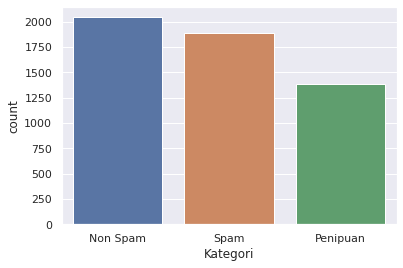

In [ ]:
# Class Distribution
print(home_data['Kategori'].value_counts())
print('\n')
print(sns.countplot(home_data['Kategori']))

In [ ]:
# Persentase Banyak Data
total_Non_Spam = home_data[home_data['Kategori']=='Non Spam']['Kategori'].count()
total_Spam = home_data[home_data['Kategori']=='Spam']['Kategori'].count()
total_Penipuan = home_data[home_data['Kategori']=='Penipuan']['Kategori'].count()

percent_Non_Spam = (total_Non_Spam/(total_Non_Spam+total_Spam+total_Penipuan)*100)
percent_Spam = (total_Spam/(total_Non_Spam+total_Spam+total_Penipuan)*100)
percent_Penipuan= (total_Penipuan/(total_Non_Spam+total_Spam+total_Penipuan)*100)
print(percent_Non_Spam, '%')
print(percent_Spam, '%')
print(percent_Penipuan, '%')

38.428275991727766 %
35.55179545027261 %
26.019928557999624 %


In [ ]:
# Describe Dataset
home_data.describe()

,Kategori,Text
count,5319,5319
unique,3,3403
top,Non Spam,Mohon maaf pulsa anda tidak mencukupi. Harap T...
freq,2044,57


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c0618fa00>,
      dtype=object)

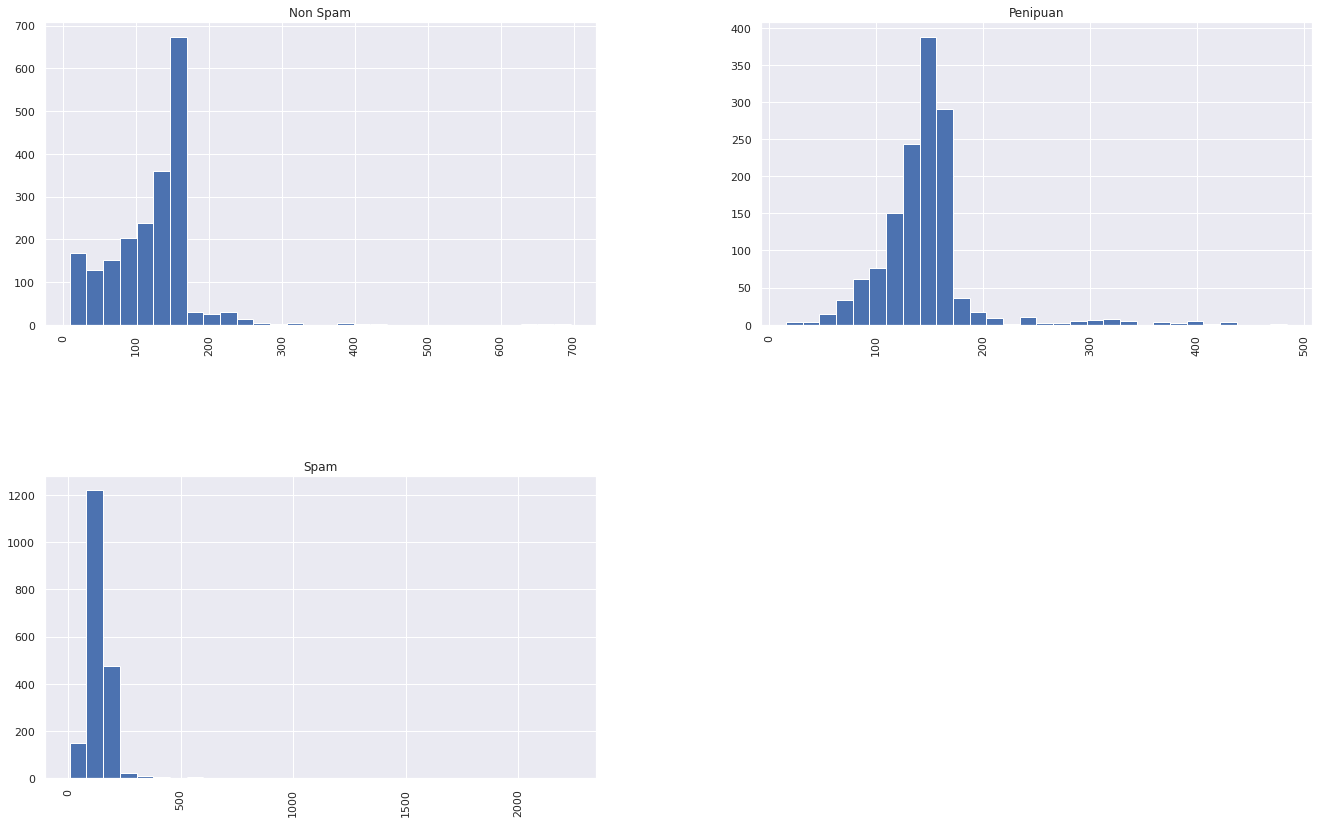

In [ ]:
home_data['Length'] = home_data['Text'].apply(len)
home_data.hist(column='Length', by='Kategori', bins=30, figsize=(22,14))

In [ ]:
# Tahap Preprocessing Data

import re

def praproses(home_data):
  texts = []

  for text in home_data:
    # Menghapus @name[mention]
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)

    text = re.sub(r"https?://(?:www\.)?\S+", "", text)


    # Menghapus link bit.ly
    text = re.sub(r"bit.ly/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", text)

    # Menghapus  links[https://blabala.com]
    text = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", text)
    # text = re.sub(r"http\S+", "", text)

    # Menghapus enter / baris baru
    text = re.sub('\n', '', text)

    # Menghapus tanda baca dan angka
    text = re.sub("[^a-zA-Z^']", " ", text)
    text = re.sub(" {2,}", " ", text)

    # Menghapus spasi awal dan akhir
    text = text.strip()

    # Menghapus spasi dengan satu spasi
    text = re.sub(r'\s+', ' ', text)

    # Menghapus link www.
    # text = re.sub(r'www.(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))', '', text)

    # Mengubah mennjadi text kecil (lower)
    text = text.lower();
    texts.append(text)
  return texts

In [ ]:
# Periksa data setelah preproccesing
home_data['Praproses']=praproses(home_data['Text'])
home_data.head()

,Kategori,Text,Length,Praproses
0,Non Spam,Hoaks itu jahat! Kesehatan kita terancam,40,hoaks itu jahat kesehatan kita terancam
1,Non Spam,COVID-19 gelombang ketiga? Waspadalah! Segera ...,69,covid gelombang ketiga waspadalah segera vaksi...
2,Non Spam,Hambat varian Omicron di Indonesia dengan disi...,124,hambat varian omicron di indonesia dengan disi...
3,Non Spam,Walau sudah boleh berkegiatan di luar rumah,43,walau sudah boleh berkegiatan di luar rumah
4,Non Spam,Vaksinasi lengkap dan booster + disiplin proke...,159,vaksinasi lengkap dan booster disiplin prokes ...


In [ ]:
# Tokenisasi
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def token(home_data):
  return home_data.apply(nltk.word_tokenize)

In [ ]:
# Periksa data setelah tokenisai
home_data['Token']=token(home_data['Praproses'])
home_data.head()

,Kategori,Text,Length,Praproses,Token
0,Non Spam,Hoaks itu jahat! Kesehatan kita terancam,40,hoaks itu jahat kesehatan kita terancam,"[hoaks, itu, jahat, kesehatan, kita, terancam]"
1,Non Spam,COVID-19 gelombang ketiga? Waspadalah! Segera ...,69,covid gelombang ketiga waspadalah segera vaksi...,"[covid, gelombang, ketiga, waspadalah, segera,..."
2,Non Spam,Hambat varian Omicron di Indonesia dengan disi...,124,hambat varian omicron di indonesia dengan disi...,"[hambat, varian, omicron, di, indonesia, denga..."
3,Non Spam,Walau sudah boleh berkegiatan di luar rumah,43,walau sudah boleh berkegiatan di luar rumah,"[walau, sudah, boleh, berkegiatan, di, luar, r..."
4,Non Spam,Vaksinasi lengkap dan booster + disiplin proke...,159,vaksinasi lengkap dan booster disiplin prokes ...,"[vaksinasi, lengkap, dan, booster, disiplin, p..."


In [ ]:
# Steming
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 7.8 MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
def stemming(home_data):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  return [stemmer.stem(text) for text in home_data]

In [ ]:
# Periksa data setelah Steming
home_data['Stemmed'] = home_data['Token'].apply(stemming)
home_data.head()

,Kategori,Text,Length,Praproses,Token,Stemmed
0,Non Spam,Hoaks itu jahat! Kesehatan kita terancam,40,hoaks itu jahat kesehatan kita terancam,"[hoaks, itu, jahat, kesehatan, kita, terancam]","[hoaks, itu, jahat, sehat, kita, ancam]"
1,Non Spam,COVID-19 gelombang ketiga? Waspadalah! Segera ...,69,covid gelombang ketiga waspadalah segera vaksi...,"[covid, gelombang, ketiga, waspadalah, segera,...","[covid, gelombang, tiga, waspada, segera, vaks..."
2,Non Spam,Hambat varian Omicron di Indonesia dengan disi...,124,hambat varian omicron di indonesia dengan disi...,"[hambat, varian, omicron, di, indonesia, denga...","[hambat, varian, omicron, di, indonesia, denga..."
3,Non Spam,Walau sudah boleh berkegiatan di luar rumah,43,walau sudah boleh berkegiatan di luar rumah,"[walau, sudah, boleh, berkegiatan, di, luar, r...","[walau, sudah, boleh, giat, di, luar, rumah]"
4,Non Spam,Vaksinasi lengkap dan booster + disiplin proke...,159,vaksinasi lengkap dan booster disiplin prokes ...,"[vaksinasi, lengkap, dan, booster, disiplin, p...","[vaksinasi, lengkap, dan, booster, disiplin, p..."


In [ ]:
# Mengubah Kata kata Gaul
import requests

In [ ]:
slang_word = requests.get('https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt').text
dict_slang = eval(slang_word)

In [ ]:
# Periksa Kata gaul yang di ubah
slang_df = pd.DataFrame(dict_slang.items(), columns=['Old', 'New'])
slang_df.head()

,Old,New
0,@,di
1,abis,habis
2,ad,ada
3,adlh,adalah
4,afaik,as far as i know


In [ ]:
# Menghapus Spasi yang tersisa
slang_df['Old'] = slang_df['Old'].apply(lambda x: x.strip())
slang_df['New'] = slang_df['New'].apply(lambda x: x.strip())

In [ ]:
# Mengubah ke nilai kunci
slang_dict = {}
for i, row in slang_df.iterrows():
  slang_dict.update({row['Old']: row['New']})

In [ ]:
def removeSlang(data):
  # Iterasi data
  for i, word in enumerate(data):
    # memeriksa data didalam kamus slang(kata gaul) atau tidak
    try:
      data[i] = slang_dict[word]
    # jika data tidak gaul maka lulus
    except KeyError:
      pass
  return data

In [ ]:
home_data['Tidak_Gaul'] = home_data['Stemmed'].apply(removeSlang)
home_data.head()

,Kategori,Text,Length,Praproses,Token,Stemmed,Tidak_Gaul
0,Non Spam,Hoaks itu jahat! Kesehatan kita terancam,40,hoaks itu jahat kesehatan kita terancam,"[hoaks, itu, jahat, kesehatan, kita, terancam]","[hoaks, itu, jahat, sehat, kita, ancam]","[hoaks, itu, jahat, sehat, kita, ancam]"
1,Non Spam,COVID-19 gelombang ketiga? Waspadalah! Segera ...,69,covid gelombang ketiga waspadalah segera vaksi...,"[covid, gelombang, ketiga, waspadalah, segera,...","[covid, gelombang, tiga, waspada, segera, vaks...","[covid, gelombang, tiga, waspada, segera, vaks..."
2,Non Spam,Hambat varian Omicron di Indonesia dengan disi...,124,hambat varian omicron di indonesia dengan disi...,"[hambat, varian, omicron, di, indonesia, denga...","[hambat, varian, omicron, di, indonesia, denga...","[hambat, varian, omicron, di, indonesia, denga..."
3,Non Spam,Walau sudah boleh berkegiatan di luar rumah,43,walau sudah boleh berkegiatan di luar rumah,"[walau, sudah, boleh, berkegiatan, di, luar, r...","[walau, sudah, boleh, giat, di, luar, rumah]","[walau, sudah, boleh, giat, di, luar, rumah]"
4,Non Spam,Vaksinasi lengkap dan booster + disiplin proke...,159,vaksinasi lengkap dan booster disiplin prokes ...,"[vaksinasi, lengkap, dan, booster, disiplin, p...","[vaksinasi, lengkap, dan, booster, disiplin, p...","[vaksinasi, lengkap, dan, booster, disiplin, p..."


In [ ]:
# Stop WOrd Removal
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def removeStopWords(data):
  stop_words = set(stopwords.words('indonesian'))
  return data.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
# Periksa Data Seletah Stop Word Removal
home_data['No_Stop']=removeStopWords(home_data['Tidak_Gaul'])
home_data.head()

,Kategori,Text,Length,Praproses,Token,Stemmed,Tidak_Gaul,No_Stop
0,Non Spam,Hoaks itu jahat! Kesehatan kita terancam,40,hoaks itu jahat kesehatan kita terancam,"[hoaks, itu, jahat, kesehatan, kita, terancam]","[hoaks, itu, jahat, sehat, kita, ancam]","[hoaks, itu, jahat, sehat, kita, ancam]","[hoaks, jahat, sehat, ancam]"
1,Non Spam,COVID-19 gelombang ketiga? Waspadalah! Segera ...,69,covid gelombang ketiga waspadalah segera vaksi...,"[covid, gelombang, ketiga, waspadalah, segera,...","[covid, gelombang, tiga, waspada, segera, vaks...","[covid, gelombang, tiga, waspada, segera, vaks...","[covid, gelombang, waspada, vaksin, vaksin]"
2,Non Spam,Hambat varian Omicron di Indonesia dengan disi...,124,hambat varian omicron di indonesia dengan disi...,"[hambat, varian, omicron, di, indonesia, denga...","[hambat, varian, omicron, di, indonesia, denga...","[hambat, varian, omicron, di, indonesia, denga...","[hambat, varian, omicron, indonesia, disiplin,..."
3,Non Spam,Walau sudah boleh berkegiatan di luar rumah,43,walau sudah boleh berkegiatan di luar rumah,"[walau, sudah, boleh, berkegiatan, di, luar, r...","[walau, sudah, boleh, giat, di, luar, rumah]","[walau, sudah, boleh, giat, di, luar, rumah]","[giat, rumah]"
4,Non Spam,Vaksinasi lengkap dan booster + disiplin proke...,159,vaksinasi lengkap dan booster disiplin prokes ...,"[vaksinasi, lengkap, dan, booster, disiplin, p...","[vaksinasi, lengkap, dan, booster, disiplin, p...","[vaksinasi, lengkap, dan, booster, disiplin, p...","[vaksinasi, lengkap, booster, disiplin, prokes..."


In [ ]:
# Pengkodean Nilai Kategori
# home_data['Kategori'] = home_data['Kategori'].apply(lambda x: 1 if x == 'Non Spam' else 0)
home_data['Kategori'] = home_data['Kategori'].apply(lambda x: 1 if x == 'Non Spam' else (2 if x == 'Spam' else 3))
home_data.head()

,Kategori,Text,Length,Praproses,Token,Stemmed,Tidak_Gaul,No_Stop
0,1,Hoaks itu jahat! Kesehatan kita terancam,40,hoaks itu jahat kesehatan kita terancam,"[hoaks, itu, jahat, kesehatan, kita, terancam]","[hoaks, itu, jahat, sehat, kita, ancam]","[hoaks, itu, jahat, sehat, kita, ancam]","[hoaks, jahat, sehat, ancam]"
1,1,COVID-19 gelombang ketiga? Waspadalah! Segera ...,69,covid gelombang ketiga waspadalah segera vaksi...,"[covid, gelombang, ketiga, waspadalah, segera,...","[covid, gelombang, tiga, waspada, segera, vaks...","[covid, gelombang, tiga, waspada, segera, vaks...","[covid, gelombang, waspada, vaksin, vaksin]"
2,1,Hambat varian Omicron di Indonesia dengan disi...,124,hambat varian omicron di indonesia dengan disi...,"[hambat, varian, omicron, di, indonesia, denga...","[hambat, varian, omicron, di, indonesia, denga...","[hambat, varian, omicron, di, indonesia, denga...","[hambat, varian, omicron, indonesia, disiplin,..."
3,1,Walau sudah boleh berkegiatan di luar rumah,43,walau sudah boleh berkegiatan di luar rumah,"[walau, sudah, boleh, berkegiatan, di, luar, r...","[walau, sudah, boleh, giat, di, luar, rumah]","[walau, sudah, boleh, giat, di, luar, rumah]","[giat, rumah]"
4,1,Vaksinasi lengkap dan booster + disiplin proke...,159,vaksinasi lengkap dan booster disiplin prokes ...,"[vaksinasi, lengkap, dan, booster, disiplin, p...","[vaksinasi, lengkap, dan, booster, disiplin, p...","[vaksinasi, lengkap, dan, booster, disiplin, p...","[vaksinasi, lengkap, booster, disiplin, prokes..."


In [ ]:
# Menggabungkan kata yang sudah dibersihkan
home_data['Bersih'] = home_data['No_Stop'].apply(lambda x: ' '.join(x))
home_data.head()

,Kategori,Text,Length,Praproses,Token,Stemmed,Tidak_Gaul,No_Stop,Bersih
0,1,Hoaks itu jahat! Kesehatan kita terancam,40,hoaks itu jahat kesehatan kita terancam,"[hoaks, itu, jahat, kesehatan, kita, terancam]","[hoaks, itu, jahat, sehat, kita, ancam]","[hoaks, itu, jahat, sehat, kita, ancam]","[hoaks, jahat, sehat, ancam]",hoaks jahat sehat ancam
1,1,COVID-19 gelombang ketiga? Waspadalah! Segera ...,69,covid gelombang ketiga waspadalah segera vaksi...,"[covid, gelombang, ketiga, waspadalah, segera,...","[covid, gelombang, tiga, waspada, segera, vaks...","[covid, gelombang, tiga, waspada, segera, vaks...","[covid, gelombang, waspada, vaksin, vaksin]",covid gelombang waspada vaksin vaksin
2,1,Hambat varian Omicron di Indonesia dengan disi...,124,hambat varian omicron di indonesia dengan disi...,"[hambat, varian, omicron, di, indonesia, denga...","[hambat, varian, omicron, di, indonesia, denga...","[hambat, varian, omicron, di, indonesia, denga...","[hambat, varian, omicron, indonesia, disiplin,...",hambat varian omicron indonesia disiplin pakai...
3,1,Walau sudah boleh berkegiatan di luar rumah,43,walau sudah boleh berkegiatan di luar rumah,"[walau, sudah, boleh, berkegiatan, di, luar, r...","[walau, sudah, boleh, giat, di, luar, rumah]","[walau, sudah, boleh, giat, di, luar, rumah]","[giat, rumah]",giat rumah
4,1,Vaksinasi lengkap dan booster + disiplin proke...,159,vaksinasi lengkap dan booster disiplin prokes ...,"[vaksinasi, lengkap, dan, booster, disiplin, p...","[vaksinasi, lengkap, dan, booster, disiplin, p...","[vaksinasi, lengkap, dan, booster, disiplin, p...","[vaksinasi, lengkap, booster, disiplin, prokes...",vaksinasi lengkap booster disiplin prokes lind...


In [ ]:
# Menggabungkan Text dan Kategori yang Dibersihkan
data1 = home_data[['Bersih']]
data2 = home_data[['Kategori']]
data_bersih = pd.concat([data1, data2], axis=1)
data_bersih.head()

,Bersih,Kategori
0,hoaks jahat sehat ancam,1
1,covid gelombang waspada vaksin vaksin,1
2,hambat varian omicron indonesia disiplin pakai...,1
3,giat rumah,1
4,vaksinasi lengkap booster disiplin prokes lind...,1


In [ ]:
data_bersih.tail()

,Bersih,Kategori
5314,sayang kalah cepat khawatir ayo coba sesi baca...,3
5315,bayar transfer harap hubung ardiansah no telep...,3
5316,e tiket pesawat hrga promo terbang domestik in...,3
5317,dptkan ijazah s s asli daftar akreditasi cepat...,3
5318,selamat no simcard resmi m dptkan hadiah unit ...,3


In [ ]:
# Text Vectorizer (Pembobotan Kata) TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = data_bersih['Bersih']
kategori = data_bersih['Kategori']

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(X)
tfidf_vector.shape

(5319, 6130)

In [ ]:
# Menyeimbangakan Data Yang Tidak Sama Jumlahnya
from imblearn.over_sampling import SMOTE

In [ ]:
sampler = SMOTE()
tfidf_vector, kategori = sampler.fit_resample(tfidf_vector, kategori)
print(tfidf_vector.shape)
print(kategori.shape)

(6132, 6130)
(6132,)


In [ ]:
# Split Data (Data Training dan Testing)
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, kategori, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4905, 6130)
(1227, 6130)
(4905,)
(1227,)


In [ ]:
# Kata-Kata Umum dan Kata Kata Penting
feature_names = np.array(tfidf_vectorizer.get_feature_names())

# Sort TFIDF by value
max_tf_idfs = X_train.max(0).toarray()[0] # Get largest tfidf values across all documents.
sorted_tf_idxs = max_tf_idfs.argsort() # Sorted indices
sorted_tf_idfs = max_tf_idfs[sorted_tf_idxs] # Sorted TFIDF values

# feature_names doesn't need to be sorted! You just access it with a list of sorted indices!
smallest_tf_idfs = pd.Series(sorted_tf_idfs[:10], index=feature_names[sorted_tf_idxs[:10]])                    
largest_tf_idfs = pd.Series(sorted_tf_idfs[-10:][::-1], index=feature_names[sorted_tf_idxs[-10:][::-1]])

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

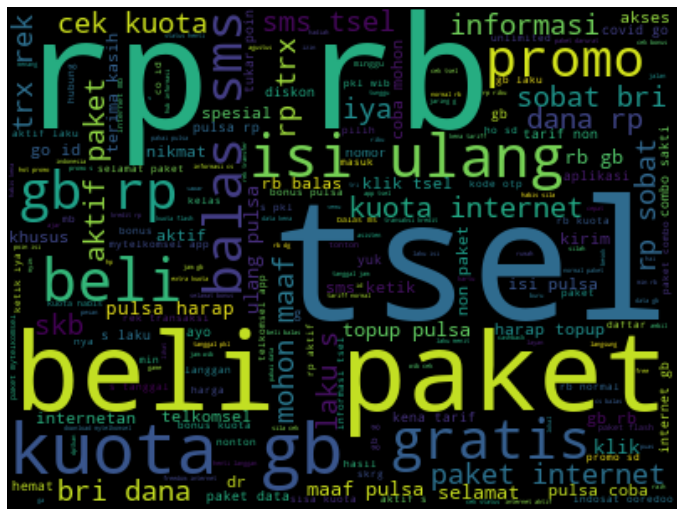

In [ ]:
# Non Spam Wordcloud
Non_Spam = ' '.join([word for word in home_data['Bersih'][data_bersih['Kategori']==1]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(Non_Spam)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

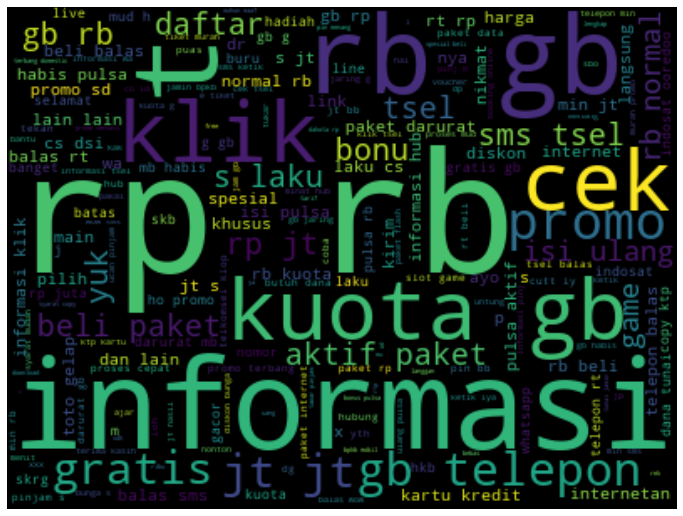

In [ ]:
# Spam Wordcloud
Spam = ' '.join([word for word in home_data['Bersih'][data_bersih['Kategori']==2]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(Spam)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

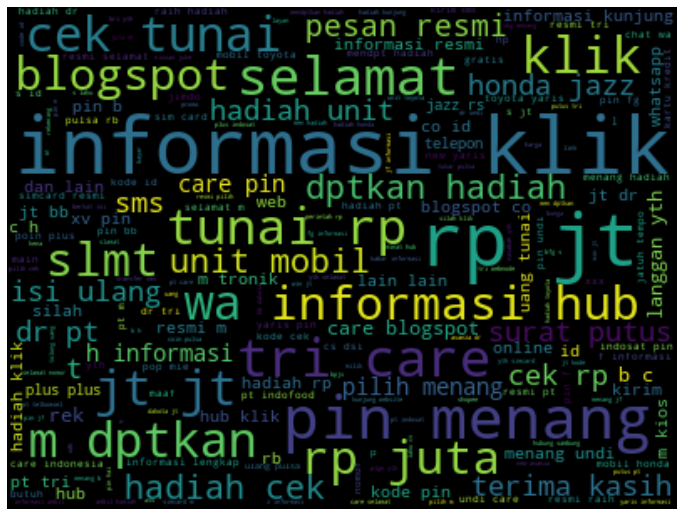

In [ ]:
# Penipuan Wordcloud
Penipuan = ' '.join([word for word in home_data['Bersih'][data_bersih['Kategori']==3]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(Penipuan)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Save new dataframe into csv file
home_data.to_csv("/content/drive/MyDrive/Uni Life's/NLP/UAS NLP/Dataset SMS Clean.csv", index=False)
# Save new dataframe into csv file
# home_data.to_csv("/content/Dataset SMS Clean.csv", index=False)

In [ ]:
# Modeling
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

In [ ]:
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = metrics.confusion_matrix(y_test, result)
  plt.figure(figsize=(6,6))
  sns.heatmap(conf_matrix, 
              annot=True,
              xticklabels=classes, 
              yticklabels=classes,
              cmap="Blues",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()

In [ ]:
# SVM
from sklearn.svm import SVC

In [ ]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train) #training svc model
y_pred_svc = svc.predict(X_test) # predicting test data

In [ ]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.8583078491335372
0.7685411572942136


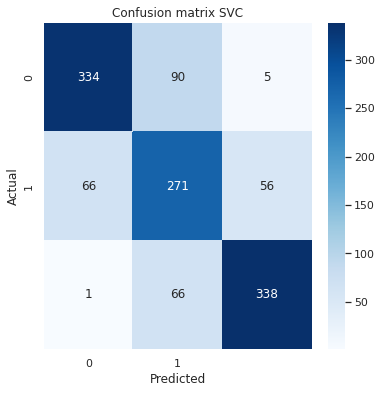

In [ ]:
print_conf(y_test, y_pred_svc, [0, 1], title="Confusion matrix SVC")

In [ ]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           1       0.83      0.78      0.80       429
           2       0.63      0.69      0.66       393
           3       0.85      0.83      0.84       405

    accuracy                           0.77      1227
   macro avg       0.77      0.77      0.77      1227
weighted avg       0.77      0.77      0.77      1227



In [ ]:
# XGBOOST
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train) #training svc model
y_pred_xgb = xgb.predict(X_test) # predicting test data

In [ ]:
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

0.7696228338430173
0.7220863895680522


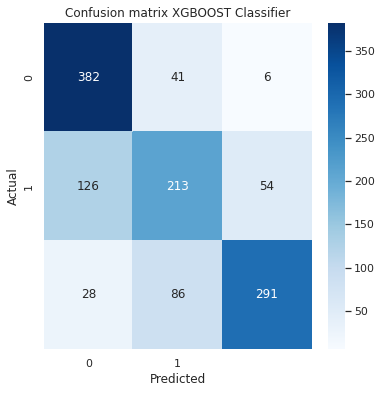

In [ ]:
print_conf(y_test, y_pred_xgb, [0, 1], title="Confusion matrix XGBOOST Classifier")

In [ ]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           1       0.71      0.89      0.79       429
           2       0.63      0.54      0.58       393
           3       0.83      0.72      0.77       405

    accuracy                           0.72      1227
   macro avg       0.72      0.72      0.71      1227
weighted avg       0.72      0.72      0.72      1227



In [ ]:
# Random SearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params = {'learning_rate': [0.025, 0.05, 0.075, 0.1], #so called `eta` value
          'max_depth': [6, 7, 8],
          'min_child_weight': [i for i in range(1, 11, 2)],
          'n_estimators': [100, 250, 500] #number of trees, change it to 1000 for better results
}

In [ ]:
random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=5, scoring='f1', n_jobs=-1, cv=5, verbose=3)

In [ ]:
random_search.fit(tfidf_vector, kategori)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(objective='multi:softprob'),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'learning_rate': [0.025, 0.05, 0.075,
                                                          0.1],
                                        'max_depth': [6, 7, 8],
                                        'min_child_weight': [1, 3, 5, 7, 9],
                                        'n_estimators': [100, 250, 500]},
                   scoring='f1', verbose=3)

In [ ]:
random_search.best_estimator_

XGBClassifier(learning_rate=0.025, max_depth=7, n_estimators=500,
              objective='multi:softprob')

In [ ]:
random_search.best_params_

{'n_estimators': 500,
 'min_child_weight': 1,
 'max_depth': 7,
 'learning_rate': 0.025}

In [ ]:
xgb_rscv = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.025, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
xgb_rscv.fit(X_train, y_train) #training svc model
y_pred_xgb_rscv = xgb_rscv.predict(X_test) # Prediksi Data Test

In [ ]:
print(xgb_rscv.score(X_train, y_train))
print(xgb_rscv.score(X_test, y_test))

0.8116207951070337
0.7351263243683781


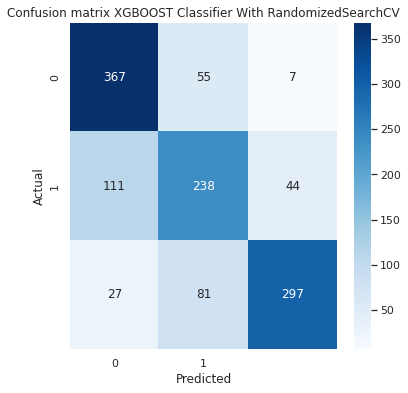

In [ ]:
print_conf(y_test, y_pred_xgb_rscv, [0, 1], title="Confusion matrix XGBOOST Classifier With RandomizedSearchCV")

In [ ]:
print(metrics.classification_report(y_test, y_pred_xgb_rscv))

              precision    recall  f1-score   support

           1       0.73      0.86      0.79       429
           2       0.64      0.61      0.62       393
           3       0.85      0.73      0.79       405

    accuracy                           0.74      1227
   macro avg       0.74      0.73      0.73      1227
weighted avg       0.74      0.74      0.73      1227



In [ ]:
# Komparasi Mopdel
# Accuracy Comparison
models = ['SVM', 'XGBOOST', 'RandomSearchCV']
accSVMC = metrics.accuracy_score(y_test,y_pred_svc)
accXGB = metrics.accuracy_score(y_test, y_pred_xgb)
accXGB_RSCV = metrics.accuracy_score(y_test, y_pred_xgb_rscv)
accuracies = [accSVMC, accXGB, accXGB_RSCV ]
comp = pd.DataFrame(list(zip(models, accuracies)), columns=['Model', 'Accuracy'])
comp

,Model,Accuracy
0,SVM,0.768541
1,XGBOOST,0.722086
2,RandomSearchCV,0.735126


In [5]:
import joblib

In [ ]:
# Menyimpan Model
joblib.dump(svc, "/content/drive/MyDrive/Uni Life's/NLP/UAS NLP/Spam SMS.joblib")
joblib.dump(tfidf_vectorizer, "/content/drive/MyDrive/Uni Life's/NLP/UAS NLP/Spam SMS TF-IDF Vectorizer.joblib")

["/content/drive/MyDrive/Uni Life's/NLP/UAS NLP/Spam SMS TF-IDF Vectorizer.joblib"]

In [ ]:
home_data['Prediction'] = svc.predict(tfidf_vectorizer.transform(home_data['Text']))
home_data['Prediction'] = home_data['Prediction'].apply(lambda x: 'Non Spam' if x == 1 else ('Spam' if x == 2 else 'Penipuan'))

# Save new dataframe into csv file
home_data.to_csv("/content/drive/MyDrive/Uni Life's/NLP/UAS NLP/Spam SMS Classification.csv", index=False)

home_data.head()

,Kategori,Text,Length,Praproses,Token,Stemmed,Tidak_Gaul,No_Stop,Bersih,Prediction
0,1,Hoaks itu jahat! Kesehatan kita terancam,40,hoaks itu jahat kesehatan kita terancam,"[hoaks, itu, jahat, kesehatan, kita, terancam]","[hoaks, itu, jahat, sehat, kita, ancam]","[hoaks, itu, jahat, sehat, kita, ancam]","[hoaks, jahat, sehat, ancam]",hoaks jahat sehat ancam,Non Spam
1,1,COVID-19 gelombang ketiga? Waspadalah! Segera ...,69,covid gelombang ketiga waspadalah segera vaksi...,"[covid, gelombang, ketiga, waspadalah, segera,...","[covid, gelombang, tiga, waspada, segera, vaks...","[covid, gelombang, tiga, waspada, segera, vaks...","[covid, gelombang, waspada, vaksin, vaksin]",covid gelombang waspada vaksin vaksin,Non Spam
2,1,Hambat varian Omicron di Indonesia dengan disi...,124,hambat varian omicron di indonesia dengan disi...,"[hambat, varian, omicron, di, indonesia, denga...","[hambat, varian, omicron, di, indonesia, denga...","[hambat, varian, omicron, di, indonesia, denga...","[hambat, varian, omicron, indonesia, disiplin,...",hambat varian omicron indonesia disiplin pakai...,Non Spam
3,1,Walau sudah boleh berkegiatan di luar rumah,43,walau sudah boleh berkegiatan di luar rumah,"[walau, sudah, boleh, berkegiatan, di, luar, r...","[walau, sudah, boleh, giat, di, luar, rumah]","[walau, sudah, boleh, giat, di, luar, rumah]","[giat, rumah]",giat rumah,Non Spam
4,1,Vaksinasi lengkap dan booster + disiplin proke...,159,vaksinasi lengkap dan booster disiplin prokes ...,"[vaksinasi, lengkap, dan, booster, disiplin, p...","[vaksinasi, lengkap, dan, booster, disiplin, p...","[vaksinasi, lengkap, dan, booster, disiplin, p...","[vaksinasi, lengkap, booster, disiplin, prokes...",vaksinasi lengkap booster disiplin prokes lind...,Non Spam


In [7]:
# Prediksi Data baru
input_SMS = ['Selamat Anda',
               'Beli Paket', 'Ayo Deposit']

def preProcessText(texts):
    new_text = []
    for text in texts:
        # text = case_folding(text)
        # text = tokenized(text)
        text = stemming(text)
        text = removeSlang(text)
        text = removeStopWords(text)
        text = ' '.join(text)
        new_text.append(text)

    return new_text

def predictNewData(sms):
    saved_model = joblib.load("/content/drive/MyDrive/Uni Life's/NLP/UAS NLP/Spam SMS.joblib") 
    saved_tfidf = joblib.load("/content/drive/MyDrive/Uni Life's/NLP/UAS NLP/Spam SMS TF-IDF Vectorizer.joblib")

    vectorized_sms = saved_tfidf.transform(sms)
    input_prediction = saved_model.predict(vectorized_sms)

    for i in range(len(input_SMS)):
        if input_prediction[i]==1:
            print('Input text:\n', 
                input_SMS[i], 
                '\nPrediction: \nIni Pesan Non Spam!\n')
        elif input_prediction[i]==2:
            print('Input text:\n', 
                input_SMS[i], 
                '\nPrediction: \nIni Pesan Spam!\n')
        else:
            print('Input text:\n', 
                input_SMS[i], 
                "\nPrediction: \nIni Pesan Penipuan!\n")
            
predictNewData(input_SMS)

Input text:
 Selamat Anda 
Prediction: 
Ini Pesan Penipuan!

Input text:
 Beli Paket 
Prediction: 
Ini Pesan Non Spam!

Input text:
 Ayo Deposit 
Prediction: 
Ini Pesan Spam!

